In [135]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit

from sklearn.datasets import fetch_california_housing

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

## 시각화 함수 선언

In [52]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([0,5],[0,5],'--r')
  plt.xlabel('True price($100,000s)')
  plt.ylabel('Predicted price($100,000s)')
  plt.tight_layout()

## 릿지 회귀

In [103]:
california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=.2)

In [70]:
model = Ridge(alpha=.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6054539222932733
평가 데이터 점수: 0.607146481511764


In [127]:
best_alpha = 0
best_score = 0

california = fetch_california_housing()

for i in range(1, 1000):
  X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=.2)
  alpha = i/1000
  model = Ridge(alpha)
  model.fit(X_train, y_train)
  # print('alpha='+str(alpha))
  # print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
  # print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))
  if model.score(X_test, y_test) > best_score:
    best_score = model.score(X_test, y_test)
    best_alpha = alpha

print('최적의 alpha 값: '+ str(best_alpha))
print('평가 데이터 점수: '+ str(best_score))

최적의 alpha 값: 0.691
평가 데이터 점수: 0.6373260369880343


In [133]:
best_iter = 0
best_score = 0

california = fetch_california_housing()

for i in range(1, 1000):

  X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=.2)
  model = Ridge(alpha=0.691, max_iter=i)
  model.fit(X_train, y_train)
  # print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
  # print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))
  if model.score(X_test, y_test) > best_score:
    best_score = model.score(X_test, y_test)
    best_iter = i

print('최적의 iter 값: '+ str(best_iter))
print('평가 데이터 점수: '+ str(best_score))

최적의 iter 값: 399
평가 데이터 점수: 0.6400689001335185


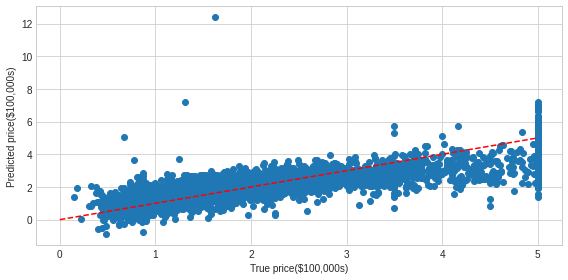

In [137]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)